In [54]:
from datetime import datetime, timedelta, time
import pandas as pd
import numpy as np
import datajoint as dj
from pipeline import pipeline_tools, lab, experiment
dj.conn()
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
wr_name = 'FOR04'
subject_id = (lab.WaterRestriction() & 'water_restriction_number = "'+wr_name+'"').fetch('subject_id')[0]
session = 10
df_behaviortrial = pd.DataFrame(((experiment.BehaviorTrial() & 'subject_id = '+str(subject_id) & 'session = '+str(session)) * experiment.SessionTrial() * experiment.SessionBlock()).fetch())


In [91]:
df_behaviortrial['trial_choice_plot'] = np.nan
df_behaviortrial['trial_choice_plot'][df_behaviortrial['trial_choice']=='left']=0
df_behaviortrial['trial_choice_plot'][df_behaviortrial['trial_choice']=='right']=1
df_behaviortrial['reward_ratio']=df_behaviortrial['p_reward_right']/(df_behaviortrial['p_reward_right']+df_behaviortrial['p_reward_left'])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


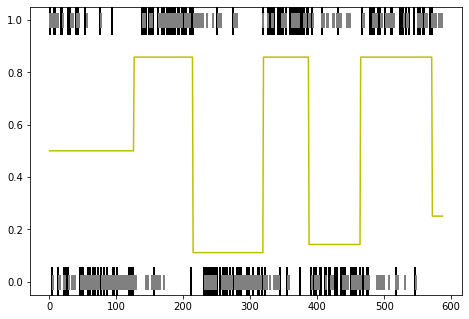

In [93]:
rewarded = (df_behaviortrial['outcome']=='hit')
unrewarded = (df_behaviortrial['outcome']=='miss')
fig=plt.figure()
ax1=fig.add_axes([0,0,1,1])
ax1.plot(df_behaviortrial['trial'][rewarded],df_behaviortrial['trial_choice_plot'][rewarded],'k|',color='black',markersize=30,markeredgewidth=2)
ax1.plot(df_behaviortrial['trial'][unrewarded],df_behaviortrial['trial_choice_plot'][unrewarded],'|',color='gray',markersize=15,markeredgewidth=2)
ax1.plot(df_behaviortrial['trial'],df_behaviortrial['reward_ratio'],'y-')
